In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
import scipy.stats as stats
from datetime import datetime
from scipy.optimize import brentq

In [52]:
ADANIPORTSCE=pd.read_csv('ADANIPORTSCE.csv')
ADANIPORTSPE=pd.read_csv('ADANIPORTSPE.csv')
CIPLACE=pd.read_csv('CIPLACE.csv')
CIPLAPE=pd.read_csv('CIPLAPE.csv')
AXISBANKCE=pd.read_csv('AXISBANKCE.csv')
AXISBANKPE=pd.read_csv('AXISBANKPE.csv')
NIFTY=pd.read_excel('NIFTYoptiondata.xlsx')

In [53]:
stockoptiondata=pd.concat([ADANIPORTSCE,ADANIPORTSPE,CIPLACE,CIPLAPE,AXISBANKCE,AXISBANKPE,NIFTY])

In [54]:
stockoptiondata.tail()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value,Unnamed: 0
86901,NIFTY,29-Mar-2023,30-Dec-2027,PE,16000.0,-,-,-,479.35,-,435.15,-,-,-,-,-,17080.7,43477.0
86902,NIFTY,29-Mar-2023,30-Dec-2027,PE,15000.0,-,-,-,601.05,601.05,307.10,-,-,-,150.00,-,17080.7,43478.0
86903,NIFTY,29-Mar-2023,30-Dec-2027,PE,14000.0,-,-,-,244.00,-,207.20,-,-,-,-,-,17080.7,43479.0
86904,NIFTY,29-Mar-2023,30-Dec-2027,PE,13000.0,-,-,-,163.00,-,132.50,-,-,-,-,-,17080.7,43480.0
86905,NIFTY,29-Mar-2023,30-Dec-2027,PE,12000.0,-,-,-,102.95,-,79.35,-,-,-,-,-,17080.7,43481.0


In [55]:
stockoptiondata.to_excel('stockoptiondata.xlsx')

In [56]:
stockoptiondata.head()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value,Unnamed: 0
0,ADANIPORTS,01-Feb-2023,23-Feb-2023,CE,980.0,0.60,1.00,0.25,0.40,0.25,0.40,57.00,349.32,0.20,25625.00,-5000.00,495.15,NaN
1,ADANIPORTS,01-Feb-2023,23-Feb-2023,CE,960.0,0.65,1.10,0.30,0.50,0.65,0.50,73.00,438.29,0.29,18750.00,-9375.00,495.15,NaN
2,ADANIPORTS,01-Feb-2023,23-Feb-2023,CE,950.0,0.95,1.15,0.45,0.55,0.45,0.55,160.00,950.67,0.67,104375.00,17500.00,495.15,NaN
3,ADANIPORTS,01-Feb-2023,23-Feb-2023,CE,940.0,0.70,1.15,0.25,0.70,0.25,0.70,77.00,452.74,0.37,36250.00,-3750.00,495.15,NaN
4,ADANIPORTS,01-Feb-2023,23-Feb-2023,CE,930.0,0.65,0.85,0.65,0.85,0.85,-,8.00,46.54,0.04,25000.00,-1250.00,495.15,NaN


In [57]:
stockoptiondata['T']=((pd.to_datetime(stockoptiondata['Expiry  '],format="%d-%b-%Y")-pd.to_datetime(stockoptiondata['Date  '],format="%d-%b-%Y")).dt.days)/252

In [58]:
stockoptiondata.loc[stockoptiondata['T']==0,'T']=1/252

In [59]:
companies=['ADANIPORTS','CIPLA','AXISBANK','NIFTY']
types=['CE','PE']
dfs={}
for name in companies:
    for t in types:
        dfs[name+t]=stockoptiondata[(stockoptiondata['Option type  '].isin([t]))  & stockoptiondata['Symbol  '].isin([name])]

In [60]:
dfs['ADANIPORTSCE']

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value,Unnamed: 0,T
0,ADANIPORTS,01-Feb-2023,23-Feb-2023,CE,980.0,0.60,1.00,0.25,0.40,0.25,0.40,57.00,349.32,0.20,25625.00,-5000.00,495.15,NaN,0.087302
1,ADANIPORTS,01-Feb-2023,23-Feb-2023,CE,960.0,0.65,1.10,0.30,0.50,0.65,0.50,73.00,438.29,0.29,18750.00,-9375.00,495.15,NaN,0.087302
2,ADANIPORTS,01-Feb-2023,23-Feb-2023,CE,950.0,0.95,1.15,0.45,0.55,0.45,0.55,160.00,950.67,0.67,104375.00,17500.00,495.15,NaN,0.087302
3,ADANIPORTS,01-Feb-2023,23-Feb-2023,CE,940.0,0.70,1.15,0.25,0.70,0.25,0.70,77.00,452.74,0.37,36250.00,-3750.00,495.15,NaN,0.087302
4,ADANIPORTS,01-Feb-2023,23-Feb-2023,CE,930.0,0.65,0.85,0.65,0.85,0.85,-,8.00,46.54,0.04,25000.00,-1250.00,495.15,NaN,0.087302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3779,ADANIPORTS,01-Mar-2023,25-May-2023,CE,450.0,-,-,-,128.90,-,170.00,-,-,-,-,-,602.10,NaN,0.337302
3780,ADANIPORTS,01-Mar-2023,25-May-2023,CE,440.0,-,-,-,136.15,-,178.25,-,-,-,-,-,602.10,NaN,0.337302
3781,ADANIPORTS,01-Mar-2023,25-May-2023,CE,430.0,-,-,-,143.65,-,186.65,-,-,-,-,-,602.10,NaN,0.337302
3782,ADANIPORTS,01-Mar-2023,25-May-2023,CE,420.0,-,-,-,151.35,-,195.25,-,-,-,-,-,602.10,NaN,0.337302


In [61]:
#2a

In [62]:
def plotter(df,dfname):
    name=dfname[:-2]
    types=dfname[-2:]
    plt.xlabel(f'{types} price')
    plt.ylabel('Strike Price')
    plt.title(name)
    plt.scatter(df['Close  '],df['Strike Price  '])
    plt.show()
    
    plt.xlabel(f'{types} price')
    plt.ylabel('Maturity')
    plt.title(name)
    plt.scatter(df['Close  '],df['T'])
    plt.show()
    
    fig=plt.figure()
    plt.title(name)
    ax=fig.add_subplot(111,projection='3d')
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Strike Price')
    ax.set_zlabel(f'{types} price')
    ax.scatter(df['T'],df['Strike Price  '],df['Close  '])
    plt.show()
    
    

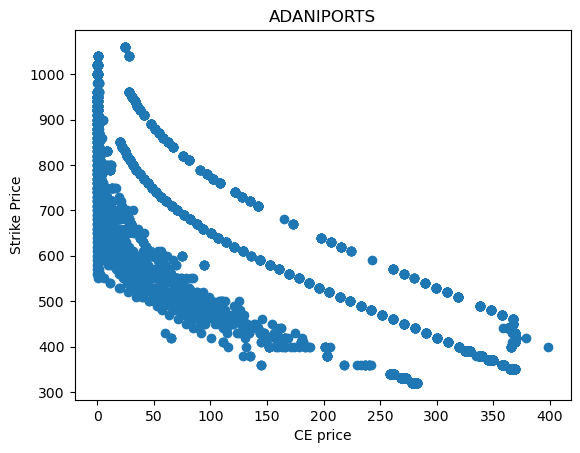

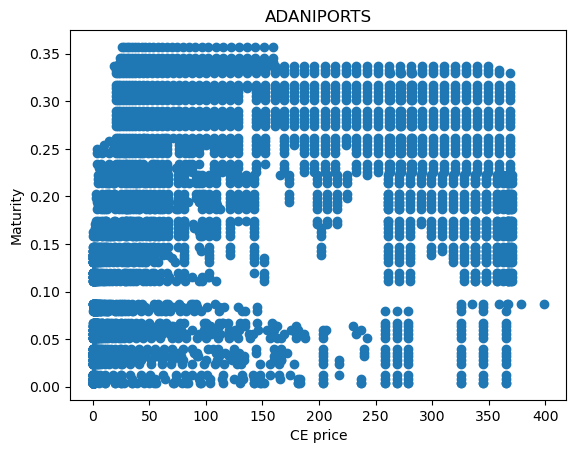

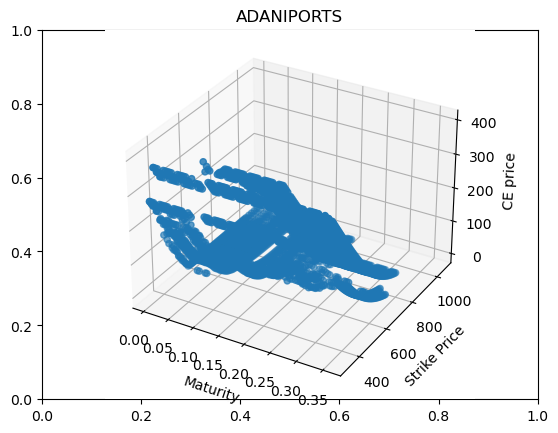

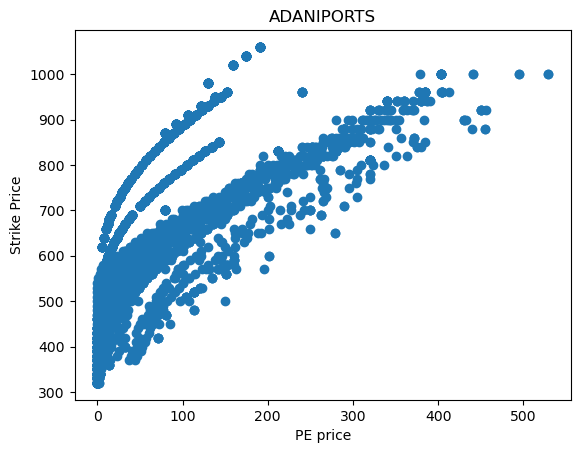

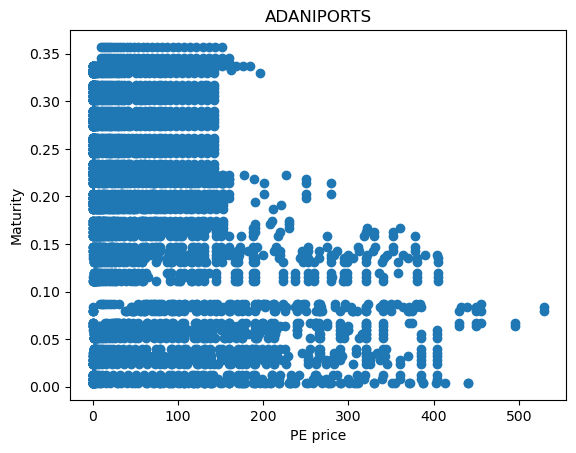

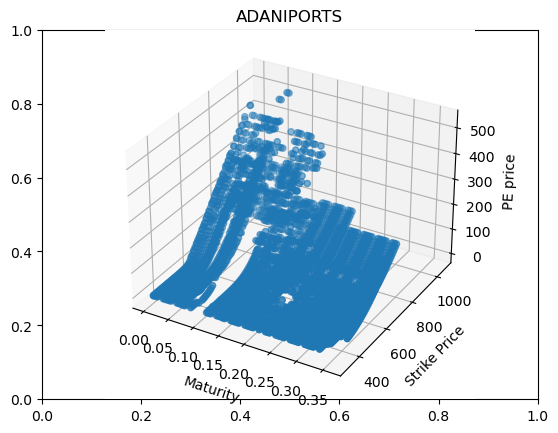

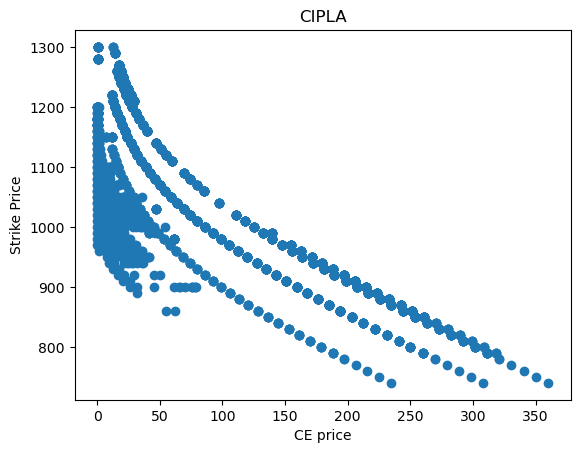

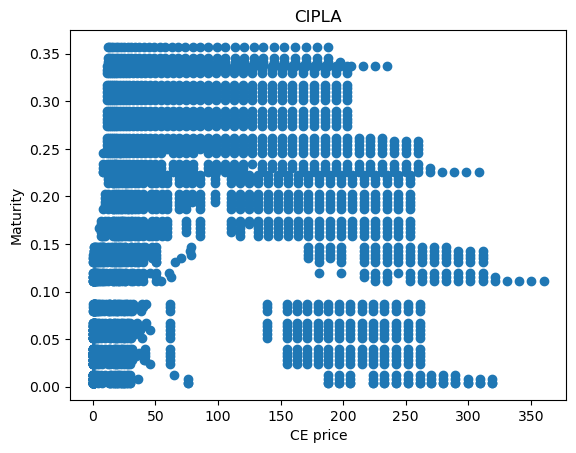

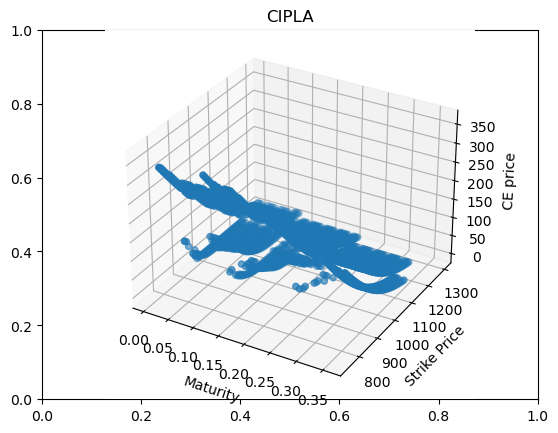

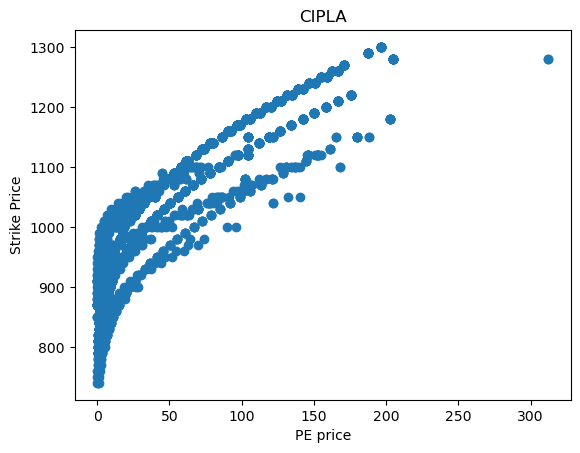

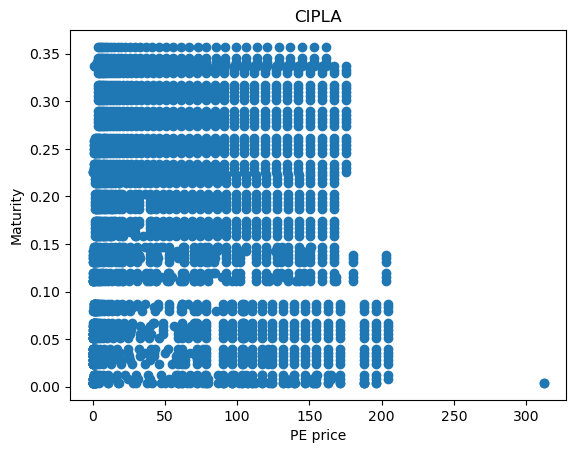

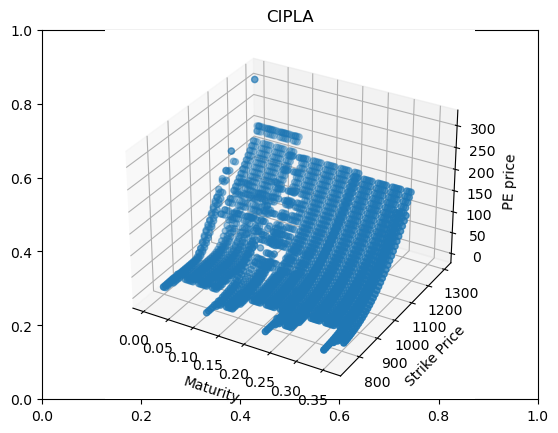

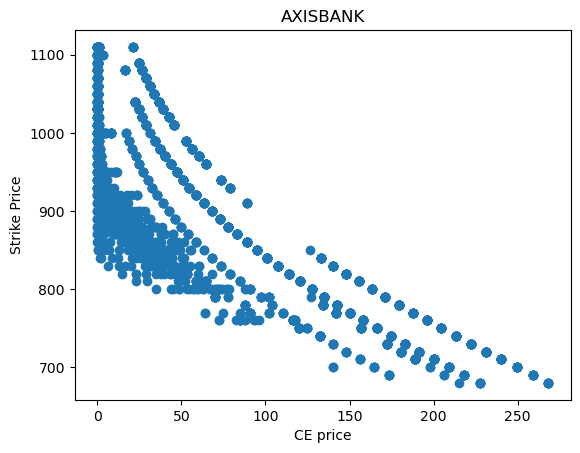

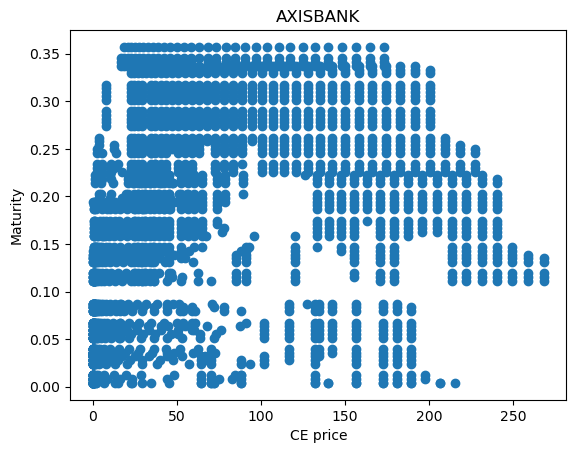

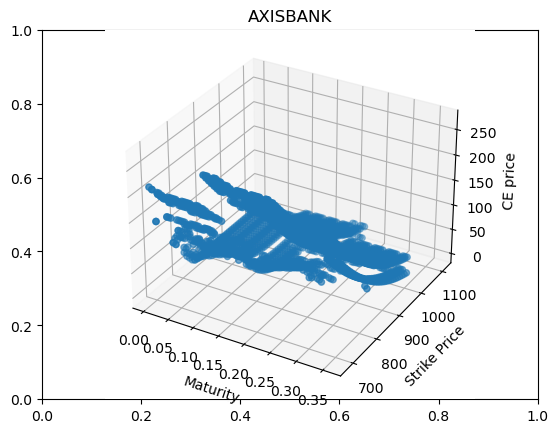

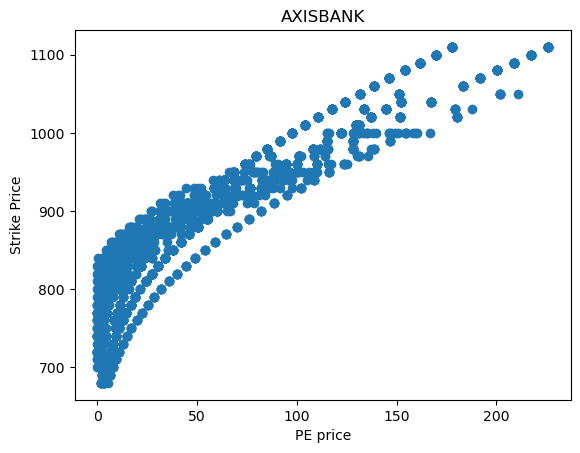

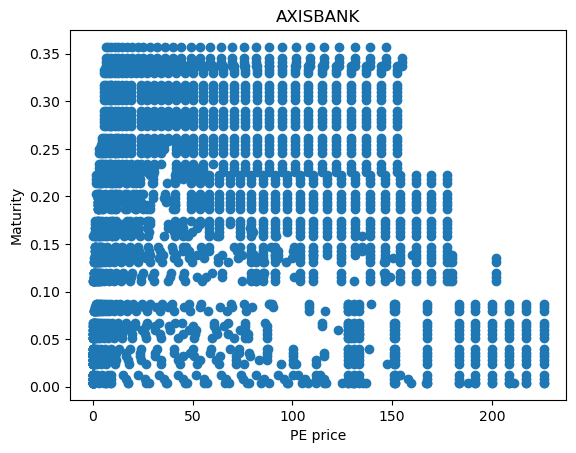

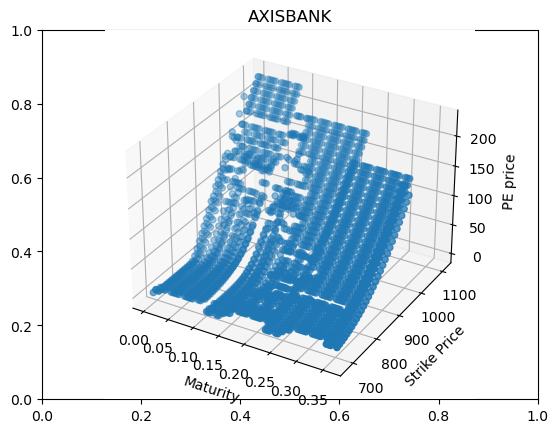

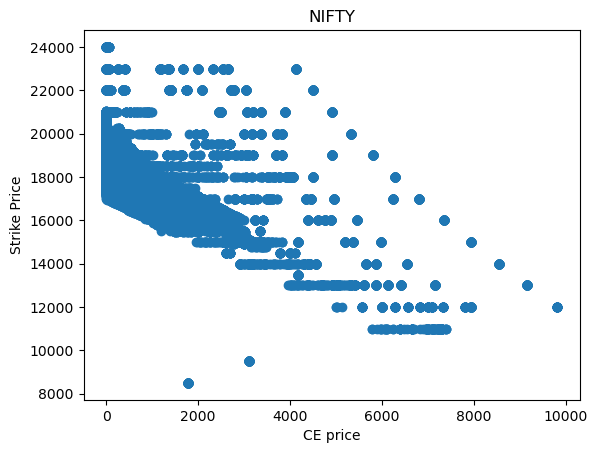

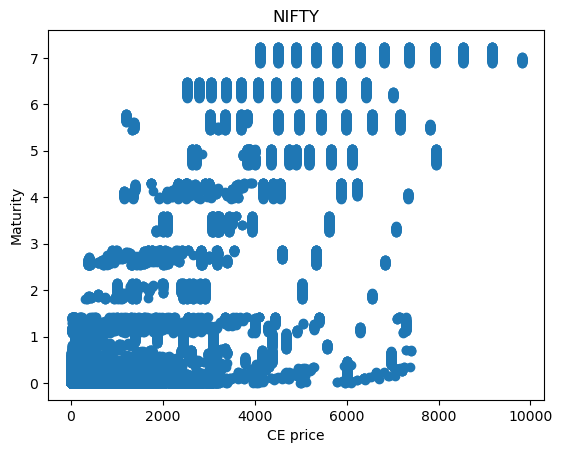

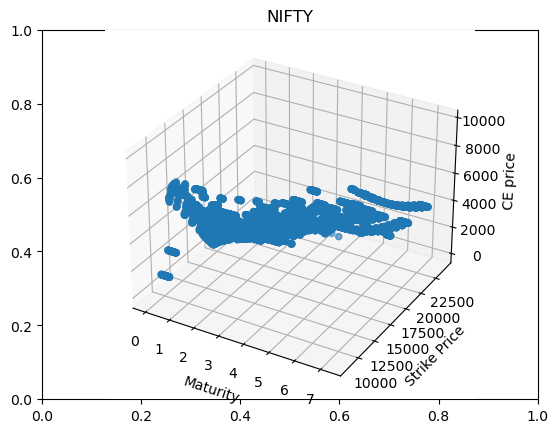

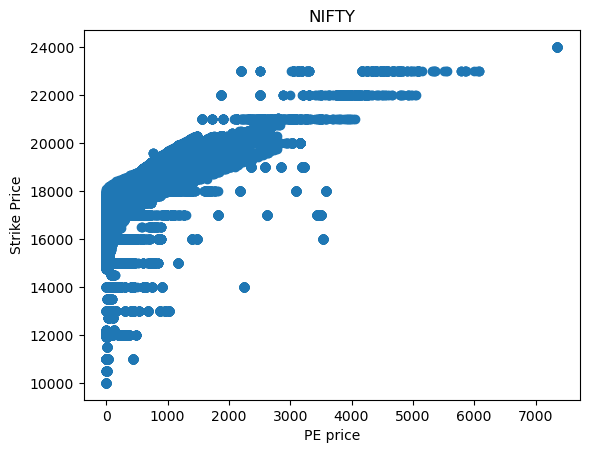

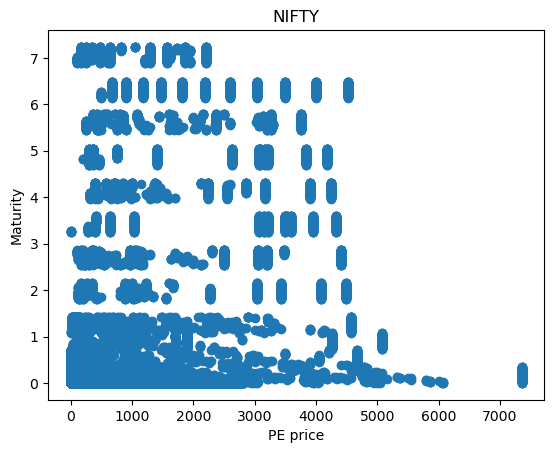

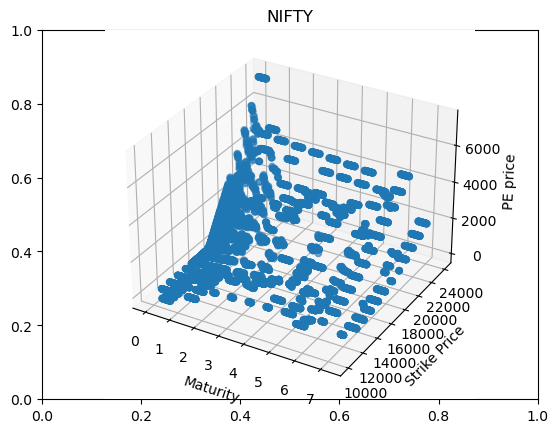

In [63]:
for df in dfs:
    plotter(dfs[df],df)

In [64]:
#2b

In [65]:
r=0.05

In [66]:
def d(sign,t,x,r,K,sigma):
  a=1/(sigma*np.power(t,0.5))
  b=np.log(x/K)+r
  c=(sigma**2)*t/2
  return a*(b+sign*c)

In [67]:
def N(x):
  return stats.norm.cdf(x)

In [68]:
def C(t,s,T,r,K,sigma):
  #rint(f"N(d)={N((d(+1,T-t,s,r,K,sigma)))}")
  a=s*N(d(+1,T-t,s,r,K,sigma))
  #rint(f"a={a}")
  b=K*np.power(np.e,-r*(T-t))*N(d(-1,T-t,s,r,K,sigma))
  #rint(f"b={b}")
  return a-b

In [69]:
def P(t,s,T,r,K,sigma):
  a=s-np.power(np.e,-r*(T-t))*K
  return C(t,s,T,r,K,sigma)-a

In [70]:
def N_(x):
    return np.power(1/(2*np.pi))*exp(-x*x/2)


In [71]:
def C_(t,s,T,r,K,sigma):
    h=sigma/100
    return (C(t,s,T,r,K,sigma+h)-C(t,s,T,r,K,sigma-h))/(2*h)

In [72]:
def findsigmaC(C0,t,s,T,r,K,sigma0,tol):
    sigma=sigma0
    print(C(t,s,T,r,K,sigma0))
    while((C(t,s,T,r,K,sigma0)-C0)>tol):
        sigma=sigma-(C(t,s,T,r,K,sigma)/C_(t,s,T,r,K,sigma))
    return sigma

In [73]:
def findsigmaCr(row):
    sigma=sigma0
    #print(C(t,s,T,r,K,sigma0))
    t=0
    T=row['T']
    s=row['Underlying Value  ']
    K=row['Strike Price  ']
    C0=row['Close  ']
    while((C(t,s,T,r,K,sigma0)-C0)>tol):
        sigma=sigma-(C(t,s,T,r,K,sigma)/C_(t,s,T,r,K,sigma))
    return sigma

In [74]:
def fsc(C0,t,s,T,r,K,start,end):
    def tempfn(sigma):
        return C(t,s,T,r,K,sigma)-C0
    root=brentq(tempfn,start,end)
    return root

In [75]:
def fsp(P0,t,s,T,r,K,start,end):
    def tempfn(sigma):
        return P(t,s,T,r,K,sigma)-P0
    root=brentq(tempfn,start,end)
    return root

In [76]:
def impvol(df,types):
    if(types=='CE'):
        def tempfn(row):
            return fsc(row['Close  '],0,row['Underlying Value  '],row['T'],0.05,row['Strike Price  '],-100,100)
    else:
        def tempfn(row):
            return fsp(row['Close  '],0,row['Underlying Value  '],row['T'],0.05,row['Strike Price  '],-100,100)
    return df.apply(tempfn,axis=1)

In [77]:
def plotter2(df,dfname):
    name=dfname
    types=dfname[-2:]
    imp=impvol(df,types)
    #[:-2]
    #types=dfname[-2:]
    plt.xlabel('Implied Volatility')
    plt.ylabel('Strike Price')
    plt.title(name)
    plt.scatter(imp,df['Strike Price  '])
    plt.show()
    
    plt.xlabel('Implied Volatility')
    plt.ylabel('Maturity')
    plt.title(name)
    plt.scatter(imp,df['T'])
    plt.show()
    
    fig=plt.figure()
    plt.title(name)
    ax=fig.add_subplot(111,projection='3d')
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Strike Price')
    ax.set_zlabel('Implied volatility')
    ax.scatter(df['T'],df['Strike Price  '],imp)
    plt.show()

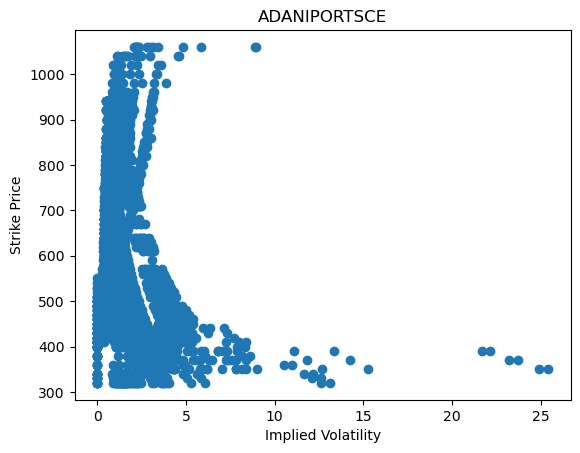

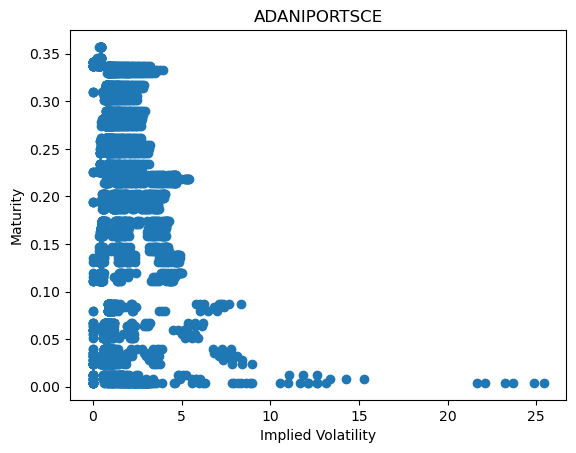

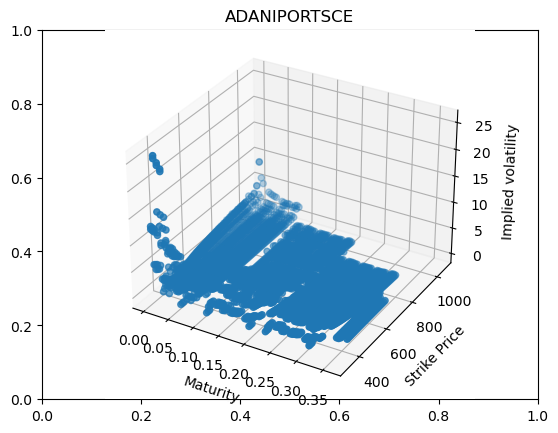

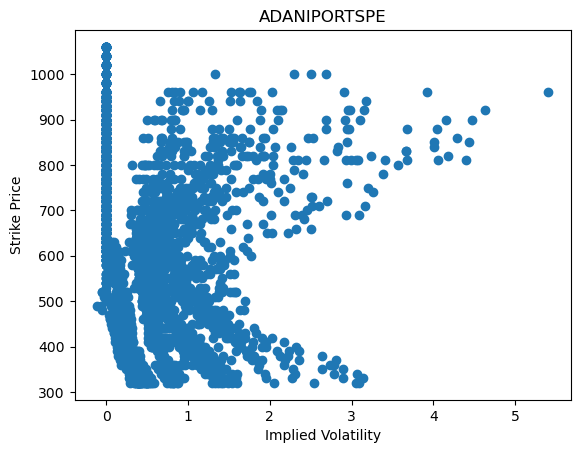

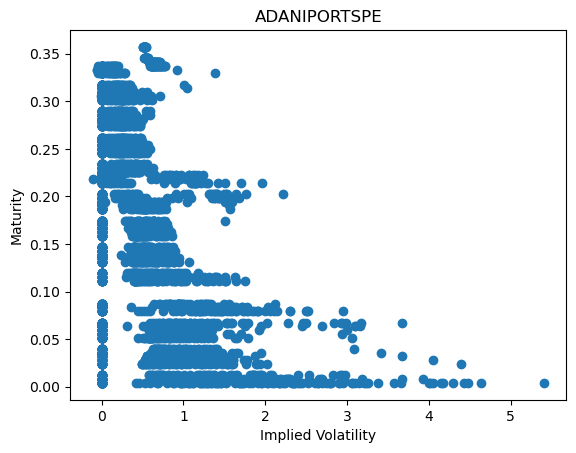

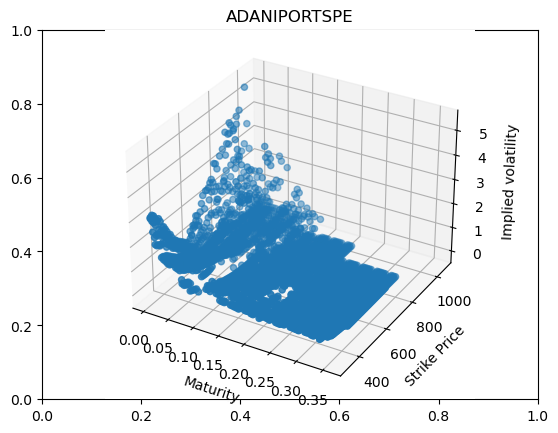

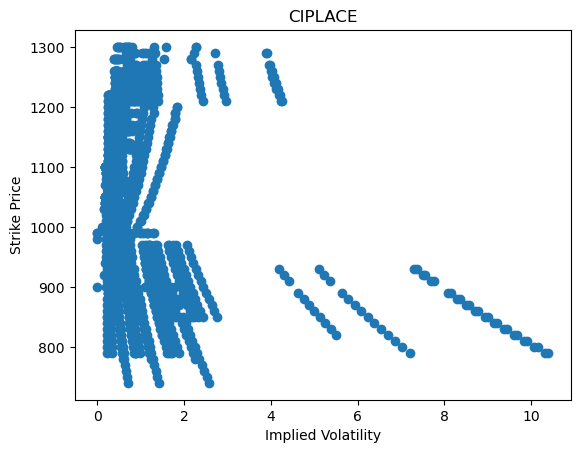

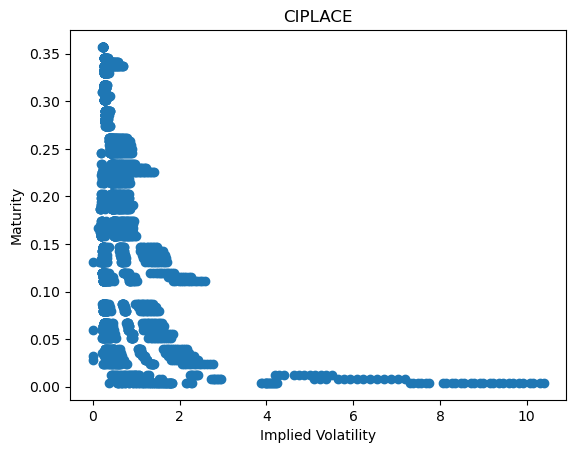

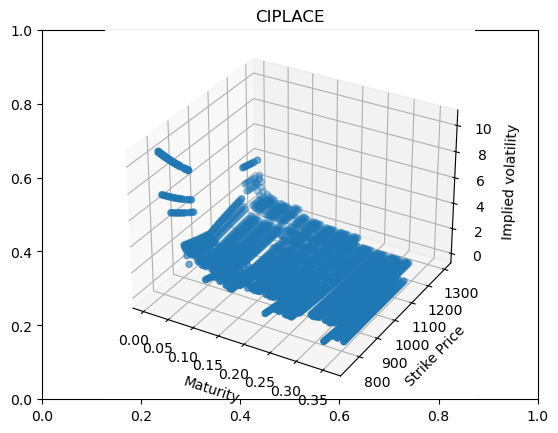

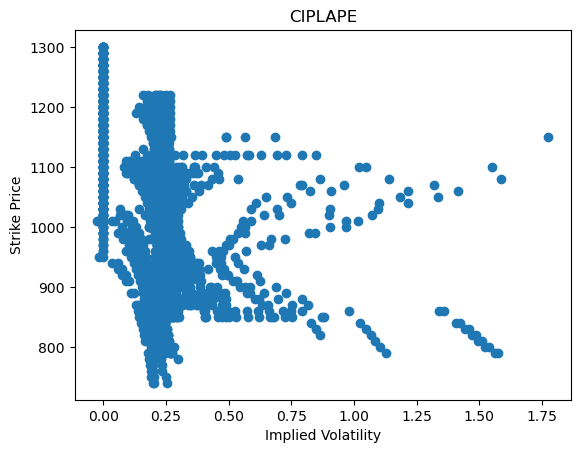

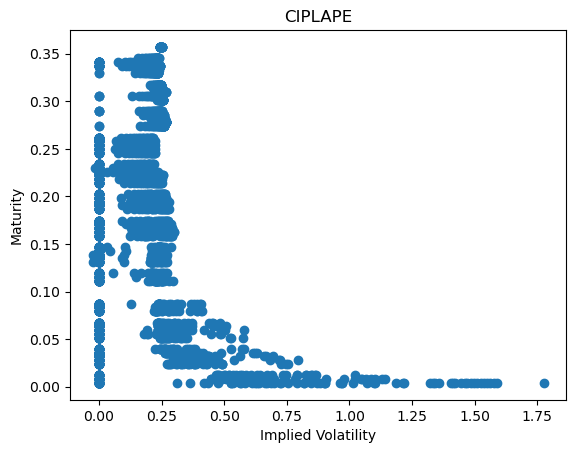

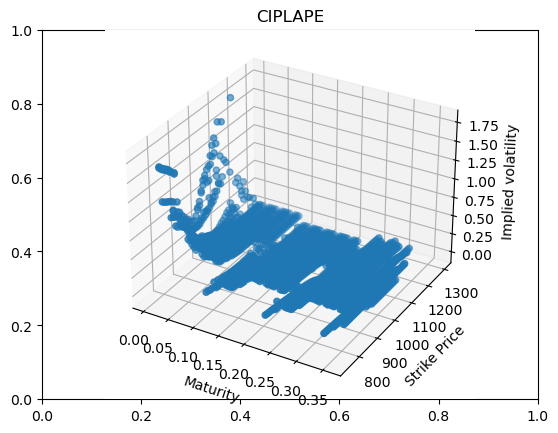

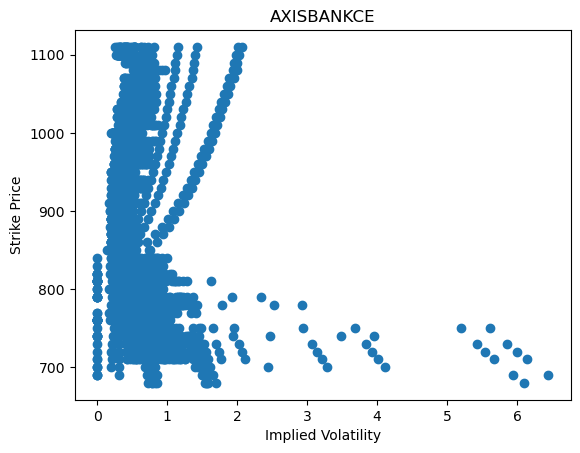

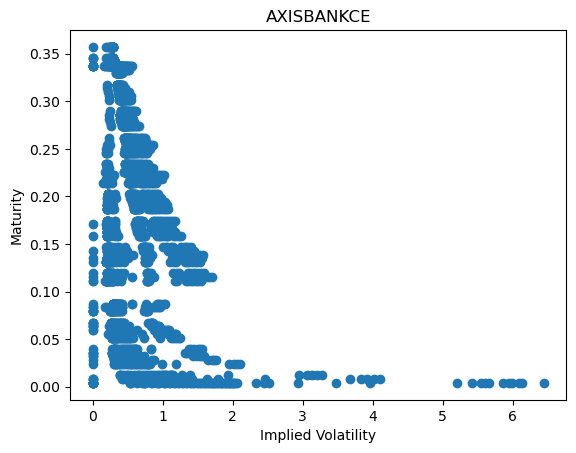

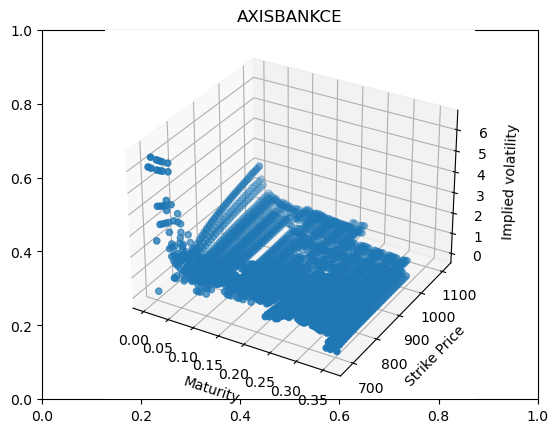

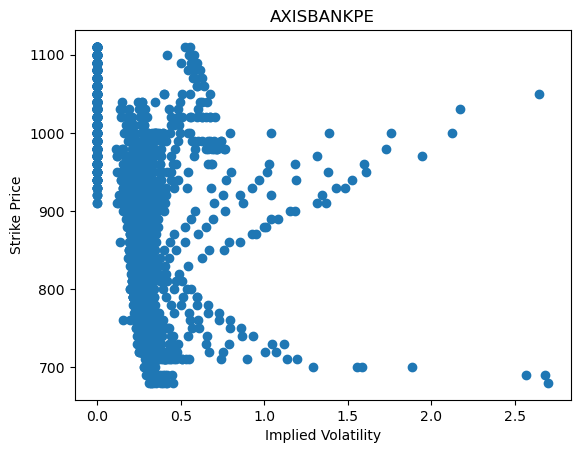

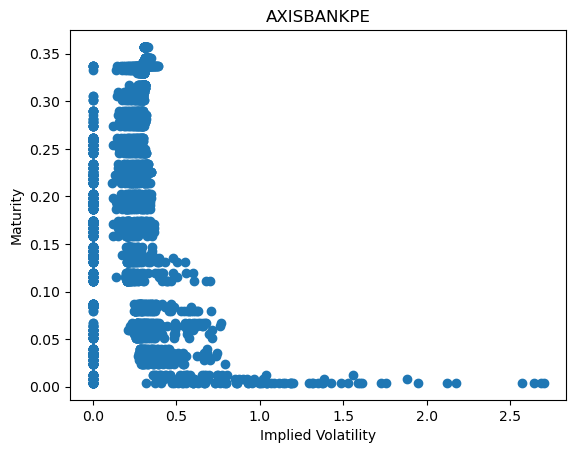

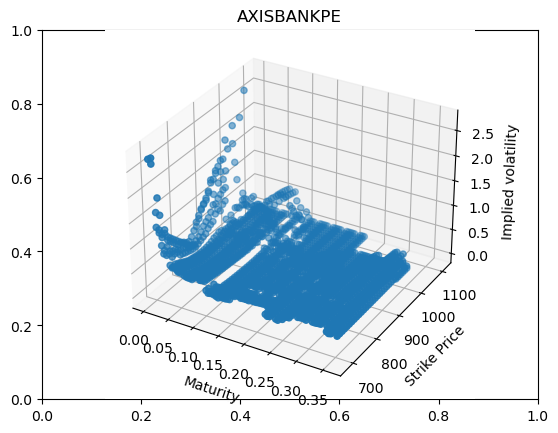

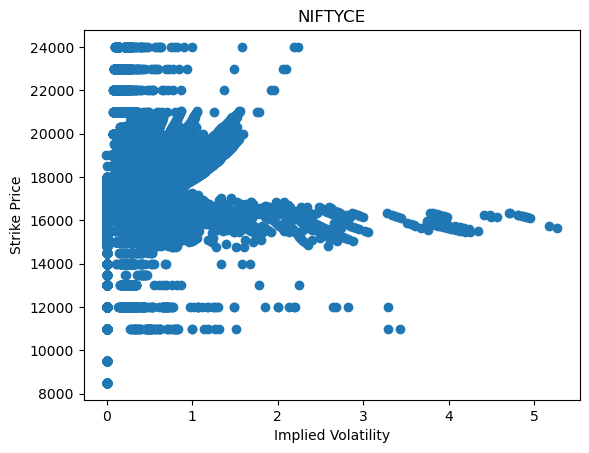

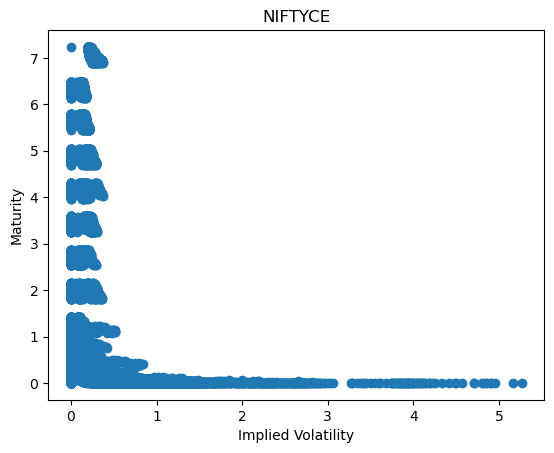

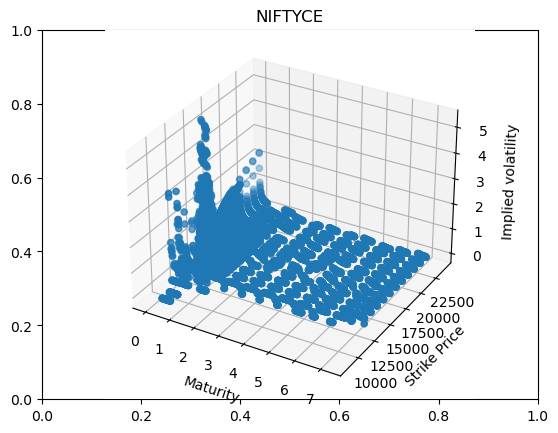

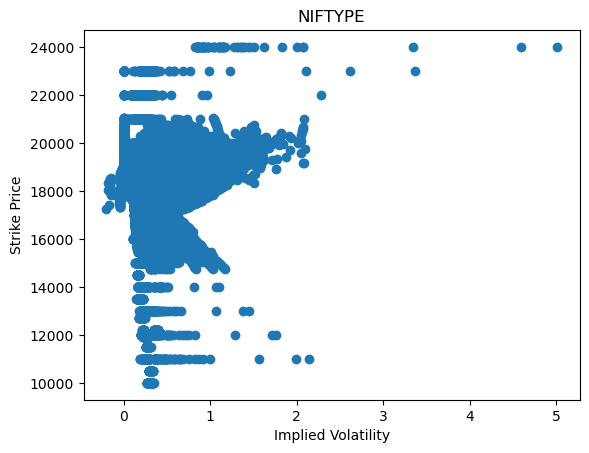

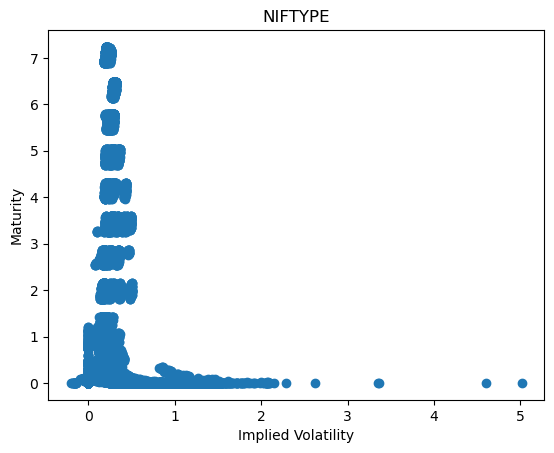

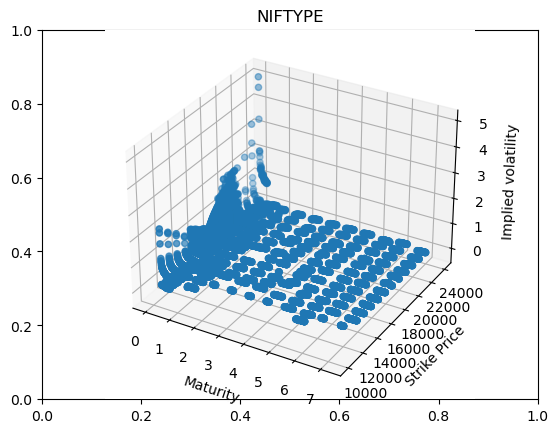

In [78]:
for df in dfs:
    plotter2(dfs[df],df)

In [40]:
nse=pd.read_excel('nsedata1.xlsx')

In [41]:
#2c

In [88]:
def plotter3(dfname,df,nse):
    if(not(dfname=='NIFTYCE'or dfname=='NIFTYPE' )):
        company=dfname[:-2]+'.NS'
    else:
        company='Stockex'
    types=dfname[-2:]
    nse['Date']=pd.to_datetime(nse['Date'])
    histvol=[]
    for index,row in df.iterrows():
        start=pd.to_datetime(row['Date  '])
        end=pd.to_datetime(row['Expiry  '])
        prices=nse[(nse['Date']>=start) & (nse['Date']<=end)][company]
        returns=prices.pct_change()
        histvol.append(returns.std()*np.power(252/(max((end-start).days,1)),0.5))
    imp=impvol(df,types)
    
    plt.title(dfname)
    plt.xlabel('historical volatility')
    plt.ylabel('implied volatility')
    plt.scatter(histvol,imp)
    plt.show()
    
    temp=pd.DataFrame({
        'historic volatility':histvol,
        'implied volatility':imp
    })
    print(temp)

In [89]:
for df in dfs:
    print(df)

ADANIPORTSCE
ADANIPORTSPE
CIPLACE
CIPLAPE
AXISBANKCE
AXISBANKPE
NIFTYCE
NIFTYPE


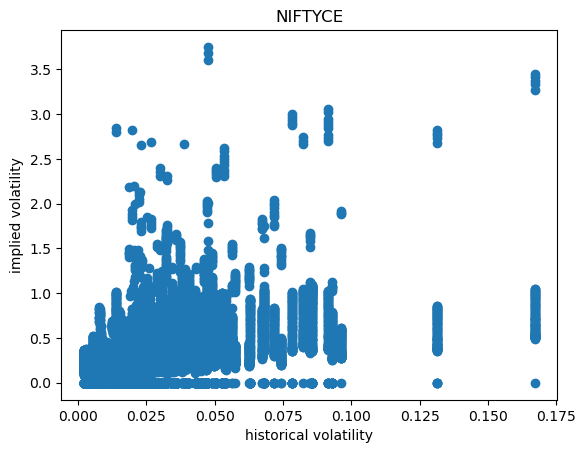

       historic volatility  implied volatility
0                 0.052564            0.868560
1                 0.052564            0.868560
2                 0.052564            0.862703
3                 0.052564            0.862703
4                 0.052564            0.856581
...                    ...                 ...
43419             0.002262            0.289384
43420             0.002262            0.302093
43421             0.002262            0.317214
43422             0.002262            0.335207
43423             0.002262            0.356576

[43424 rows x 2 columns]


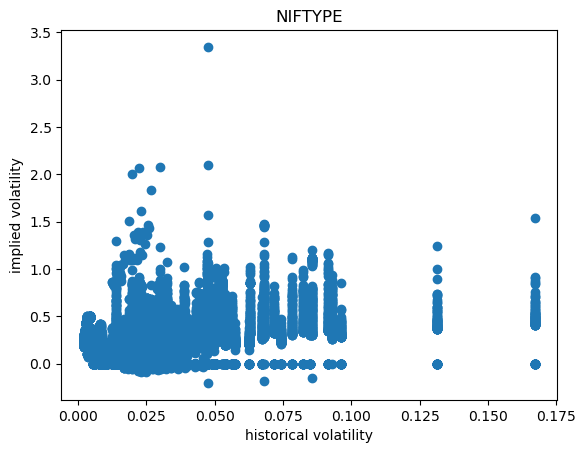

       historic volatility  implied volatility
43424             0.052564        2.968904e-13
43425             0.052564        2.968904e-13
43426             0.052564        7.345764e-14
43427             0.052564        7.345764e-14
43428             0.052564        6.663285e-01
...                    ...                 ...
86901             0.002262        1.996040e-01
86902             0.002262        2.260305e-01
86903             0.002262        2.062816e-01
86904             0.002262        2.101887e-01
86905             0.002262        2.146293e-01

[43482 rows x 2 columns]


In [90]:
for df in ['NIFTYCE','NIFTYPE']:
    plotter3(df,dfs[df],nse)

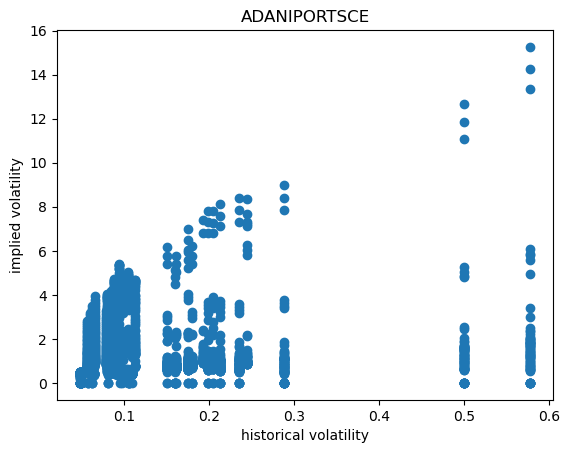

      historic volatility  implied volatility
0                0.244255        9.425326e-01
1                0.244255        9.426843e-01
2                0.244255        9.409797e-01
3                0.244255        9.561149e-01
4                0.244255        9.668230e-01
...                   ...                 ...
3779             0.048411        7.015265e-13
3780             0.048411        1.068934e-12
3781             0.048411        4.735061e-13
3782             0.048411        1.060929e-12
3783             0.048411        9.059967e-13

[3784 rows x 2 columns]


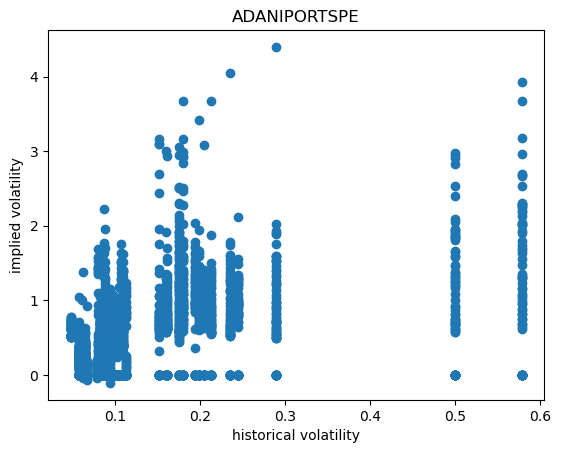

      historic volatility  implied volatility
0                0.244255        7.790285e-01
1                0.244255        1.358591e-13
2                0.244255       -1.711959e-12
3                0.244255        8.329068e-01
4                0.244255        7.058304e-01
...                   ...                 ...
3779             0.048411        6.592374e-01
3780             0.048411        6.030777e-01
3781             0.048411        7.783897e-01
3782             0.048411        6.823326e-01
3783             0.048411        7.699881e-01

[3784 rows x 2 columns]


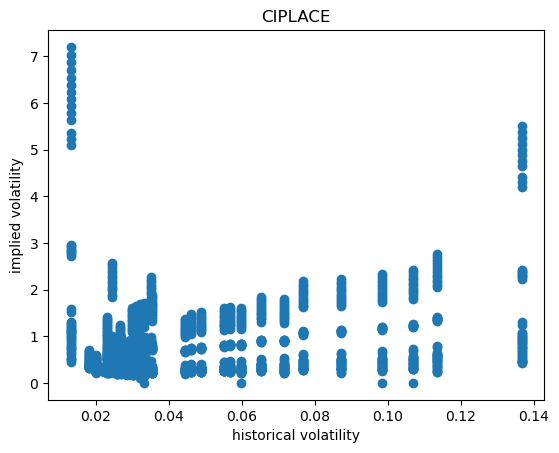

      historic volatility  implied volatility
0                0.044315            0.980132
1                0.044315            0.233154
2                0.044315            1.024696
3                0.044315            1.048663
4                0.044315            1.073878
...                   ...                 ...
2726             0.018070            0.352454
2727             0.018070            0.356446
2728             0.018070            0.361036
2729             0.018070            0.365675
2730             0.018070            0.370857

[2731 rows x 2 columns]


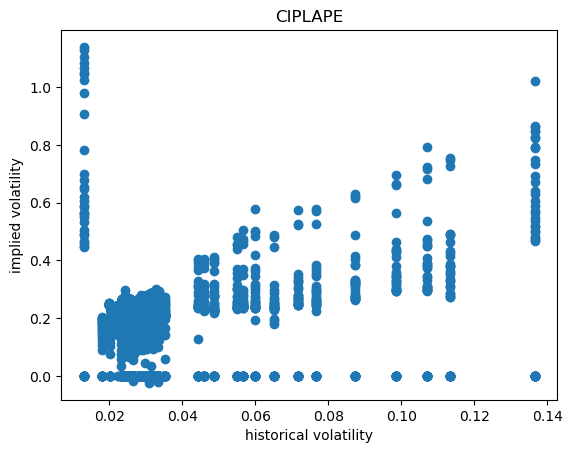

      historic volatility  implied volatility
0                0.044315        2.391142e-01
1                0.044315        1.266169e-01
2                0.044315        3.668202e-01
3                0.044315        2.893858e-01
4                0.044315        6.347292e-13
...                   ...                 ...
2726             0.018070        1.819905e-01
2727             0.018070        4.427139e-13
2728             0.018070        1.751131e-01
2729             0.018070        1.481101e-13
2730             0.018070        1.876789e-01

[2731 rows x 2 columns]


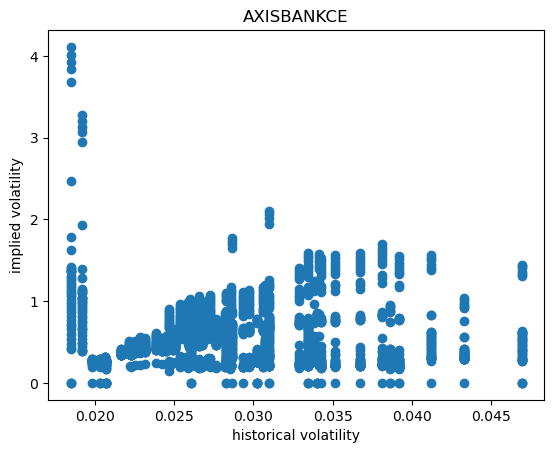

      historic volatility  implied volatility
0                0.043267        7.596359e-01
1                0.043267        2.898179e-01
2                0.043267        3.497737e-01
3                0.043267        3.875767e-01
4                0.043267        2.914053e-01
...                   ...                 ...
2436             0.020722        3.564229e-13
2437             0.020722        2.499754e-01
2438             0.020722        4.697102e-13
2439             0.020722        2.148810e-01
2440             0.020722        1.890386e-13

[2441 rows x 2 columns]


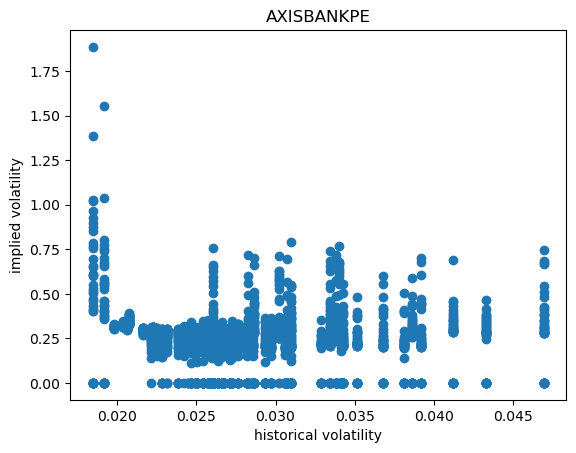

      historic volatility  implied volatility
0                0.043267        2.805995e-01
1                0.043267        3.462240e-01
2                0.043267        3.375700e-01
3                0.043267        2.890848e-01
4                0.043267        1.241620e-13
...                   ...                 ...
2436             0.020722        3.460258e-01
2437             0.020722        3.540179e-01
2438             0.020722        3.563850e-01
2439             0.020722        3.520304e-01
2440             0.020722        3.310718e-01

[2441 rows x 2 columns]


KeyError: 'NIFTY.NS'

In [82]:
for df in dfs:
    plotter3(df,dfs[df],nse)